# Class Notes on Multi-class Logistic Classification
## by Joseph Nahmias <<joe@nahmias.net>>
### Based on the [Machine Learning class](https://www.coursera.org/learn/machine-learning/) by Andrew Ng on Coursera -- Weeks 3 & 4
This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="float:right; border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>

## 1. Logistic Classification Model

### 1.1 Logistic Hypothesis Function:

For classification, unlike regression, we do not need our model to return an arbitrary output that it computes (like the price of a house); rather, we just need a binary decision on whether the input matches what we are looking for (eg. cancerous tumor).  Therefore, we want our hypothesis function, $ h_θ(x) $, to take a set of input feature values and return a prediction value between 0 and 1, showing whether the input matches the class (1) or doesn't (0).  The logistic function $ g(z) = \frac{1}{1+e^{-z}} $ is a smooth, continuous function which asymptotically approaches 0 or 1 very quickly, as demonstrated in the graph below.  Plugging this into our  notation of input features (*x*) and model parameters (*θ*) we get the following for our logistic classification hypothesis function:

$$ h_θ(x) = g(θ^Tx) = \boxed{\frac{1}{1 + e^{-θ^Tx}}} $$

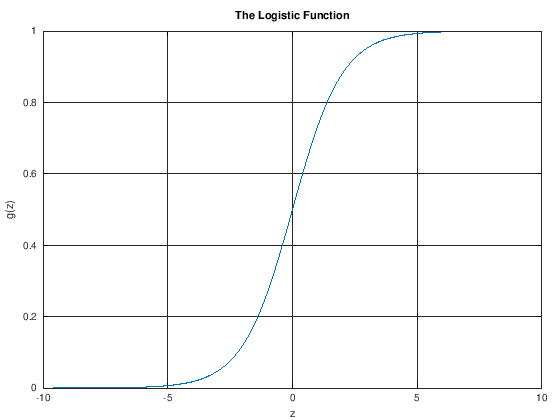

In [1]:
z = linspace(-10,10,5001);
plot(z, 1 ./ (1+exp(-z)));
grid on;
title('The Logistic Function')
xlabel('z');
ylabel('g(z)');

## 1.2 The Logistic Cost Function

ans =

   401     1

ans =

   401   401

ans =

   20    2

ans =

   160801       20

ans =

   160801        1



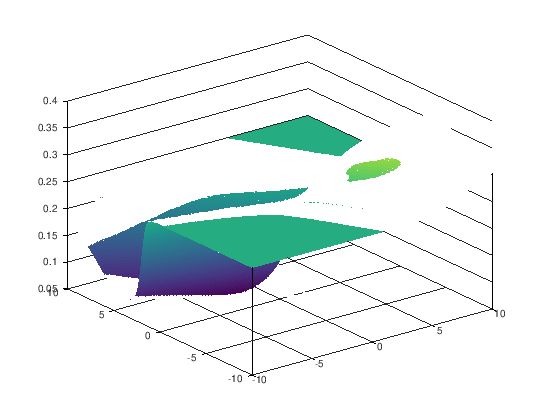

In [11]:
Xv = [2 3 4 5 6 7 7 8 9 10 11 12 13 14 16 17 18 19 20 21]' ./ 4;
y =  [0 0 0 0 0 0 1 0 1  0  1  0  1  0  1  1  1  1  1  1]';
%plot(Xv, y, "bx;actual;"); legend("location", "east");
%figure;
%tv = [4 -2.5];
tv = linspace(-10,10,401)';
size(tv)
[x1,x2] = meshgrid(tv,tv);
size(x1)
t = [x1(:) x2(:)];
X = [ones(size(Xv,1),1) Xv];size(X)
h = 1.0 ./ (1+exp(-t*X'));
size(h)
J = sumsq(h-y',2)./(2*size(y,1));
size(J)
J0 = reshape(J,401,401);
mesh(x1,x2,J0);

### 1.2.1 Constructing the new logistic cost function
We want the cost to depend on *y* such that the cost is high when $ h_θ(x) \neq y $.  The negative log function can give us the shape that we want, if we give it appropriate parameters.  Using a piece-wise function for the two possible values of *y*, we can construct the cost to be low when $h_θ(x)$ is the same as *y*; and make it grow quickly as $h_θ(x)$ moves farther away from the correct value of *y*.  This gives us the cost function:

$$ 
Cost(h_θ(x), y) = \begin{cases}
- \log(h_θ(x)) & \mbox{if } y = 1 \\
- \log(1 - h_θ(x)) & \mbox{if } y = 0
\end{cases}
$$

Writing this as a single equation, rather than piecewise (with cases), we get:

$$ Cost(h_θ(x), y) = \boxed{-y \log(h_θ(x)) - (1−y) \log( 1 − h_θ(x) )} $$

So that if y = 0, the first term drops out and we're left with $ \bf{- \log(1 − h_θ(x))} $, corresponding to the below-left graph; and if y = 1, the second term drops out and we're left with $ \bf{- \log(h_θ(x))} $, corresponding to the below-right graph.

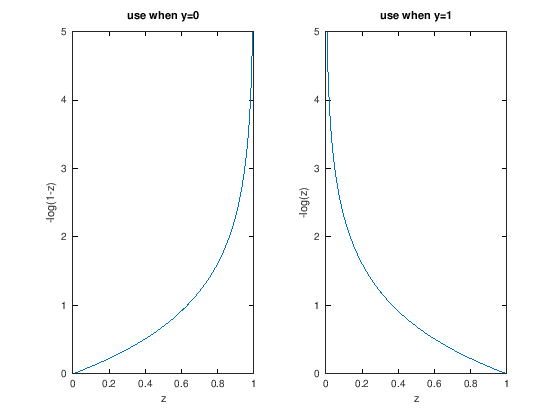

In [1]:
z = [0:0.001:1];
subplot(121);
plot(z, -log(1-z));
axis([0, 1, 0, 5]);
title('use when y=0');
xlabel('z');
ylabel('-log(1-z)');
subplot(122);
plot(z, -log(z));
axis([0, 1, 0, 5]);
title('use when y=1');
xlabel('z');
ylabel('-log(z)');

### 1.2.2 Vectorizing the Cost Function

We want the total cost of the model, J(θ), to be equal to the average of the costs across all *m* training examples (inputs):

$$ J(θ) = \frac{1}{m} \sum_{i=1}^{m} Cost(h_θ(x), y)
= − \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_θ(x^{(i)})) + (1−y^{(i)}) \log( 1 − h_θ(x^{(i)}) ) \right]
$$

### 1.2.3 Regularizing the Vectorized Cost Function

Similar to regression, to prevent overfitting, we add the regularization parameter λ, as follows:

$$ J(θ) = − \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_θ(x^{(i)})) + (1−y^{(i)}) \log( 1 − h_θ(x^{(i)}) ) \right] +  \frac{λ}{2m} \sum_{j=1}^{n} θ_j^2 $$

## 2. Minimizing the Logistic Cost Function

To find the best model parameters, $θ_j$, for our problem, we will need to minimize J(θ) over our training data set.  To do this efficiently, we will need to compute the gradient (partial derivative) of the cost function J(θ).

### 2.1 Derivative of the Logistic (Sigmoid) Function

To start with, since our hypothesis uses the logistic function, we need to know its derivative.  The logistic function is defined as:
$$ g(z) = \frac{1}{1 + e^{-z}} = (1 + e^{-z})^{-1} $$
Taking it's derivative using the chain rule, some algebraic manipulation, and substituting the original sigmoid function, we get:
$$
g^\prime(z)
= -(1 + e^{-z})^{-2} \cdot -e^{-z} = \frac{e^{-z}}{(1 + e^{-z})^2} \\
= \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}} \\
= g(z) \cdot \left[ \frac{1 + e^{-z} - 1}{1 + e^{-z}} \right] \\
= g(z) \cdot \left[ \frac{1 + e^{-z}}{1 + e^{-z}} - \frac{1}{1 + e^{-z}} \right] \\
= \boxed{g(z) \cdot [ 1 - g(z) ]}
$$

### 2.2 Cost Function Gradient

As when we constructed the cost function, we will take its partial derivative in two parts, as follows, then put it back together.

1. When y = 0: $J(θ) = - \log(1 − h_θ(x)) = - \log(1 - g(θ^Tx))$

In this case, we get:
$$ \frac{\partial}{\partial θ} J(θ)
= \frac{-1}{1 − g(θ^Tx)} \cdot -g^\prime(θ^Tx) \\
= \frac{1}{1 − g(θ^Tx)} \cdot \left(g(θ^Tx) \cdot [1-g(θ^Tx)] \cdot x\right)
= g(θ^Tx) \cdot x
= \boxed{h_θ(x) \cdot x}
$$

2. When y = 1: $J(θ) = - \log(h_θ(x)) = - \log(g(θ^Tx))$

In this case, we get:
$$ \frac{\partial}{\partial θ} J(θ)
= \frac{-1}{g(θ^Tx)} \cdot \left(g(θ^Tx) \cdot [1-g(θ^Tx)] \cdot x\right)
= -[1-g(θ^Tx)] \cdot x
= \boxed{[h_θ(x)-1] \cdot x}
$$
3. Putting it all together, we get:
$$ \frac{\partial}{\partial θ} J(θ)
= y \, [h_θ(x)-1] \, x + (1-y) \, h_θ(x) \, x \\
= [y\,h_θ(x) - y + h_θ(x) - y\,h_θ(x) ] \, x
= \boxed{[h_θ(x) - y] \, x}
$$

### 2.3 Vectorized and Regularized Logistic Gradient
Since $ \frac{\partial}{\partial θ} θ_j^2 = 2θ_j $, using the result
above we can write the vectorized logistic gradient with regularization as:
$$ \frac{\partial}{\partial θ} J(θ) 
= \frac{1}{m} \sum_{i=1}^{m} \left[ h_θ(x^{(i)}) - y^{(i)} \right] \, x^{(i)}
+ \frac{λ}{m} \sum_{j=1}^{n} θ_j
$$

In [3]:
function [J, grad] = logisticRegularCostGrad(theta, X, y, lambda)
  m = length(y);  % number of training examples
  h = 1.0 ./ ( 1.0 + exp(-X*theta) );  % Logistic classification hypothesis
  % Cost function
  J = ( -y'*log(h) - (1-y')*log(1-h) )/m + sumsq(theta(2:end))*lambda/(2*m);
  % Gradient
  grad = X'*(h-y)/m;
  grad(2:end) += theta(2:end)*lambda/m;
  grad = grad(:);
end

In [4]:
% Test the logistic cost function
theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = logisticRegularCostGrad(theta_t, X_t, y_t, lambda_t);

fprintf('Cost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \t', grad);
fprintf('\nExpected gradients:\n');
fprintf(' 0.146561\t -0.548558\t 0.724722\t 1.398003');

Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 	 -0.548558 	 0.724722 	 1.398003 	
Expected gradients:
 0.146561	 -0.548558	 0.724722	 1.398003

## 3. Training the Logistic Classification Model

Now that we know the logistic cost function and its gradient, and have a function in Octave to calculate them, we can use a number of methods to find the parameters [θ] that minimize the cost J(θ).

### 3.1 Gradient Descent

As with linear regression, we can use the gradient descent method to find the parameters that best fit the data using the following update rule(s):

$$ θ_0 := θ_0 - α \frac{1}{m} \sum_{i=1}^m \left[  h_θ( x^{(i)} ) - y^{(i)} \right] \, x_0^{(i)} $$
$$ θ_j := θ_j - α \left[ \frac{1}{m} \sum_{i=1}^m \left[  h_θ( x^{(i)} ) - y^{(i)}  \right] \, x_j^{(i)} + \frac{λ}{m} θ_j \right] $$

As we saw previously, this requires picking a good step-size (α) and doing simultaneous updates of all the model parameters ($ θ_j $).

### 3.2 Other algorithms

Since we have a function that can compute the cost and gradient of our model, we are not limited to gradient descent but can use a variety of optimization algorithms to compute the best parameters.  Some examples are:

  - Conjugate Gradient
  - BFGS
  - L-BFGS
 
While these are more complex than gradient descent, they are often reach a small cost faster (fewer iterations) and do not require you to manually pick a step-size (α) to do the optimization.  The class homework package has provided an Ocatave implementation of Conjugate Gradient in the function fmincg(), which is what we will use here to train the model.  The `optim` add-on package for Octave (available from Octave Forge) provides implementations of many such algorithms.

## 4. Logistic One-vs-all Classification

### 4.1 Load the provided training data and display a random sample from it.

**Note**: The numeral zero [0] is labeled as 10.

ans =

    9   10    4    6    6    2   10   10    7   10    4    4    7   10    6
    1    7    1    2    9    9    6   10    5    4    9    9    4    2    4
   10    9    6    9    3    6    3    4    8    5    5    6    1   10    4
    5    9    2    4    8    1   10    4    8    1    7   10    3    9    3
   10    4    6   10    6    4    1    6    9    4   10    9    1    3   10
    7   10    9    8    3    8    3   10    1    3    1    8    9    6    1
   10    6    3    8    9    1    6    8   10    2    4    7    6    3    1
    9    1    3    8    9   10    6    8    3    7    5    4    7    2    3
    9   10    2    8    3    8    8   10    3    7    3    8    5    6    3
    5    9    5    8    5    6    8    2    3    6    1    5    3    6    9
    4    7    4    1    3    1    2    9    3    8    5    4    2    9    5
    3    6   10    3    6    2    6    6    5    5    1   10    8    5    6
   10    7    1    4    1    9    6    9    2   10    8    3   10    2    1
    9

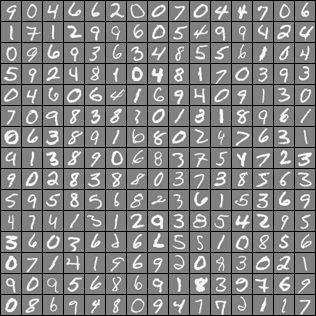

In [5]:
load('mnist_hw_train5000.mat');
samp = randperm( size(X,1), 225 );
displayData( X(samp,:) );
reshape(y(samp), 15, 15)'

### 4.2 Train the model
Here we train ten logistic classifiers, one for each digit, using the Conjugate Gradient algorithm.

In [6]:
function [Theta] = logisticOneVsAll(X, y, num_labels, lambda)
  m = size(X, 1);  % number of training examples
  n = size(X, 2);  % number of features
  options = optimset('GradObj', 'on', 'MaxIter', 50);
  Theta = zeros(num_labels,n+1);
  for c = 1:num_labels
    J = @(t)(logisticRegularCostGrad(t, [ones(m,1) X], (y == c), lambda));
    Theta(c,:) = fmincg(J, zeros(n+1,1), options);
  endfor
end

In [7]:
t = logisticOneVsAll(X, y, 10, 0.1);

Iteration    50 | Cost: 1.370923e-02
Iteration    50 | Cost: 5.725251e-02
Iteration    50 | Cost: 6.400686e-02
Iteration    50 | Cost: 3.603003e-02
Iteration    50 | Cost: 6.185898e-02
Iteration    50 | Cost: 2.139842e-02
Iteration    50 | Cost: 3.489897e-02
Iteration    50 | Cost: 8.567667e-02
Iteration    50 | Cost: 7.981951e-02
Iteration    50 | Cost: 1.003178e-02


### 4.3 Logistic One-vs-all Prediction
Here we use the Logistic Classification model we trained above to make predictions by feeding the input to all ten of the classifiers and choosing the one that gives the largest output (ie. closest to one).  We also check the model by running it against the entire training dataset and computing the average error.

In [8]:
function p = oneVsAllPrediction(all_theta, X)
  [i, p] = max(1 ./ (1 + exp(-[ones(size(X,1),1) X]*all_theta')), [], 2);
end

In [9]:
pred = oneVsAllPrediction(t, X);
fprintf('Training Set Logistic Prediction Accuracy (should be ~ 94.9%%): %0.2f%%', mean(double(pred == y)) * 100);

Training Set Logistic Prediction Accuracy (should be ~ 94.9%): 95.00%